In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [29]:
# Load the datasets
dataset = pd.read_csv('dataset.csv')
just_features = pd.read_csv('just_features.csv')

In [30]:
dataset

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
0,masculino,casado,suburbana,35.8,sim,adulto_meia_idade,18213.9
1,feminino,separado,urbana,39.3,nao,adulto_senior,4266.4
2,masculino,solteiro,rural,40.7,nao,jovem,854.6
3,masculino,casado,urbana,28.2,sim,adulto_meia_idade,10169.7
4,feminino,solteiro,urbana,31.1,nao,adulto_senior,4151.5
...,...,...,...,...,...,...,...
2210,feminino,solteiro,suburbana,35.4,nao,adulto_senior,5283.3
2211,feminino,solteiro,rural,29.9,nao,adulto_senior,4867.4
2212,feminino,solteiro,rural,26.1,nao,adulto_jovem,2261.2
2213,feminino,solteiro,urbana,27.7,nao,adulto_jovem,1536.3


In [31]:
# Separate categorical and numerical columns
categorical_columns = ['genero', 'estado_civil', 'zona_residencia', 'fumador', 'class_etaria']
numerical_columns = ['imc']

In [32]:
# Separate features (X) and target (y)
X = dataset.drop(columns=['custo'])
y = dataset['custo']

In [33]:
# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_X = pd.DataFrame(encoder.fit_transform(X[categorical_columns]),
                         columns=encoder.get_feature_names_out(categorical_columns))
encoded_just_features = pd.DataFrame(encoder.transform(just_features[categorical_columns]),
                                     columns=encoder.get_feature_names_out(categorical_columns))

In [34]:
encoder

OneHotEncoder(drop='first', sparse_output=False)

In [35]:
encoded_just_features

,genero_masculino,estado_civil_separado,estado_civil_solteiro,estado_civil_viuvo,zona_residencia_suburbana,zona_residencia_urbana,fumador_sim,class_etaria_adulto_jovem,class_etaria_adulto_meia_idade,class_etaria_adulto_senior,class_etaria_idoso,class_etaria_jovem
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
547,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
548,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
# Add numerical columns to the encoded data
encoded_X[numerical_columns] = X[numerical_columns].reset_index(drop=True)
encoded_just_features[numerical_columns] = just_features[numerical_columns].reset_index(drop=True)

In [37]:
# Normalize numerical features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [38]:
# Normalize features
encoded_X[numerical_columns] = scaler_X.fit_transform(encoded_X[numerical_columns])
encoded_just_features[numerical_columns] = scaler_X.transform(encoded_just_features[numerical_columns])

In [39]:
# Normalize target
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y_normalized, test_size=0.2, random_state=42)

In [41]:
# Train an initial SVR model
modelo = SVR()
modelo.fit(X_train, y_train.ravel())

SVR()

In [42]:
# Evaluate the model
train_score = modelo.score(X_train, y_train)
test_score = modelo.score(X_test, y_test)

print(f"Initial R^2 Score on Training Set: {train_score:.2f}")
print(f"Initial R^2 Score on Testing Set: {test_score:.2f}")

Initial R^2 Score on Training Set: 0.51
Initial R^2 Score on Testing Set: 0.33


In [43]:
# Define the parameter grid for GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear']
}

In [44]:
# Configure the grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=10, scoring='r2', n_jobs=-1)

In [45]:
# Fit the model
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']},
             scoring='r2')

In [46]:
# Get the best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [47]:
# Evaluate the model on training and testing sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print(f"R^2 Score on Training Set: {train_score:.2f}")
print(f"R^2 Score on Testing Set: {test_score:.2f}")

R^2 Score on Training Set: 0.90
R^2 Score on Testing Set: 0.43


In [48]:
# Predict on the test set and desnormalize
y_pred_normalized = best_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))

In [49]:
# Calculate R^2 for the test set
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)
print(f"R^2 Score on Test Set (Desnormalized): {r2:.2f}")

R^2 Score on Test Set (Desnormalized): 0.43


In [50]:
# Predict future costs for new customers and desnormalize
future_costs_normalized = best_model.predict(encoded_just_features)
future_costs = scaler_y.inverse_transform(future_costs_normalized.reshape(-1, 1))

In [51]:
# Save results to a CSV file
future_costs_df = pd.DataFrame({'custo': future_costs.flatten()})
future_costs_df.to_csv('55_custos_estimados.csv', index=False, float_format='%.1f')

In [52]:
# Additional task 
from sklearn.inspection import permutation_importance

In [53]:
# Calculate feature importance using permutation importance
result = permutation_importance(best_model, X_test, y_test.ravel(), scoring='r2', n_repeats=30, random_state=42)


In [54]:
# Organize the results into a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

In [55]:
# Sort features by importance
feature_importance = feature_importance.sort_values(by='importance_mean', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                           feature  importance_mean  importance_std
6                      fumador_sim         0.466879        0.046465
12                             imc         0.192555        0.048208
2            estado_civil_solteiro         0.104143        0.044671
4        zona_residencia_suburbana         0.091533        0.036945
0                 genero_masculino         0.085203        0.044067
5           zona_residencia_urbana         0.075329        0.029835
8   class_etaria_adulto_meia_idade         0.065727        0.028738
1            estado_civil_separado         0.047549        0.009900
7        class_etaria_adulto_jovem         0.041514        0.035650
11              class_etaria_jovem         0.030481        0.027986
9       class_etaria_adulto_senior         0.030112        0.023283
3               estado_civil_viuvo         0.023389        0.026485
10              class_etaria_idoso         0.021996        0.011808


In [56]:
# Plot the feature importance
import matplotlib.pyplot as plt

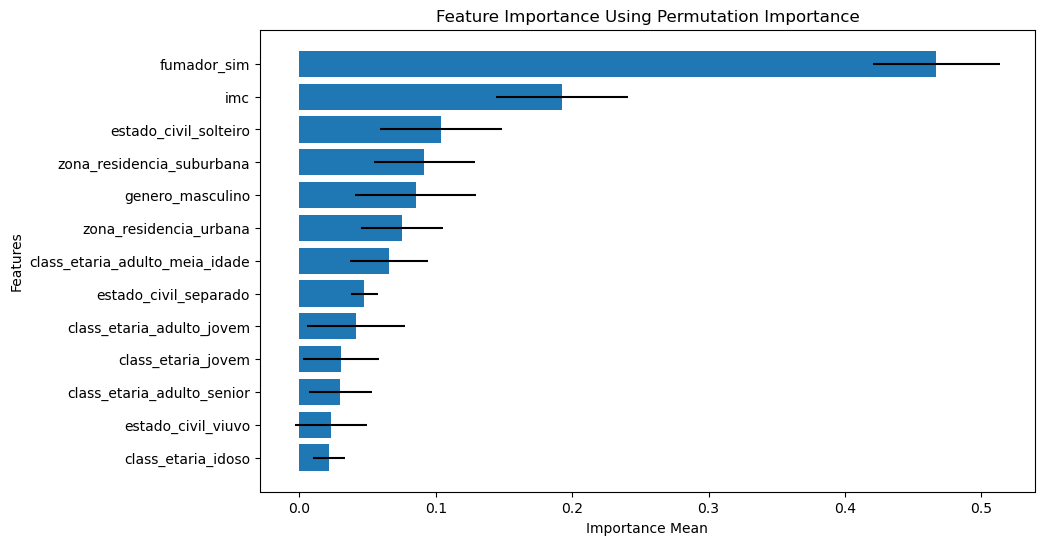

In [60]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance_mean'], xerr=feature_importance['importance_std'])
plt.xlabel('Importance Mean')
plt.ylabel('Features')
plt.title('Feature Importance Using Permutation Importance')
plt.gca().invert_yaxis()
plt.show()